# **Customer Churn Dataset Features**

| Feature | Description |
|---------|-------------|
| **CustomerID** | A unique identifier assigned to each customer. |
| **Gender** | The customer’s gender: *Male* or *Female*. |
| **Senior Citizen** | Indicates if the customer is 65 years old or older: *Yes* or *No*. |
| **Dependents** | Indicates if the customer lives with dependents (children, parents, grandparents, etc.): *Yes* or *No*. |
| **Partner** | Indicates if the customer has a partner/spouse living in the household: *Yes* or *No*. |
| **Tenure in Months** | Total number of months the customer has stayed with the company (up to the end of the quarter). |
| **Phone Service** | Whether the customer subscribes to home phone service: *Yes* or *No*. |
| **Multiple Lines** | Whether the customer subscribes to multiple telephone lines: *Yes* or *No*. |
| **Internet Service** | The type of internet service subscribed to: *No*, *DSL*, *Fiber Optic*, or *Cable*. |
| **Online Security** | Indicates if the customer subscribes to additional online security service: *Yes* or *No*. |
| **Online Backup** | Indicates if the customer subscribes to additional online backup service: *Yes* or *No*. |
| **Device Protection Plan** | Indicates if the customer subscribes to device protection for internet equipment: *Yes* or *No*. |
| **Premium Tech Support** | Indicates if the customer subscribes to premium technical support with reduced wait times: *Yes* or *No*. |
| **Streaming TV** | Whether the customer streams TV programs from third-party providers using their internet: *Yes* or *No*. |
| **Streaming Movies** | Whether the customer streams movies from third-party providers using their internet: *Yes* or *No*. |
| **Contract** | Type of contract: *Month-to-Month*, *One Year*, or *Two Year*. |
| **Paperless Billing** | Indicates if the customer uses paperless (electronic) billing: *Yes* or *No*. |
| **Payment Method** | Customer’s payment method: *Bank Withdrawal*, *Credit Card*, or *Mailed Check*. |
| **Monthly Charge** | The customer’s current total monthly charge for all services. |
| **Total Charges** | The customer’s total accumulated charges until the end of the quarter. |
| **Churn Label** | Indicates if the customer left the company this quarter: *Yes* (churned) or *No* (retained). |

## **1. Data Import & Initial Setup**

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder,OneHotEncoder
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestRegressor
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error,mean_squared_error,r2_score
from imblearn.combine import SMOTEENN

In [7]:
data = pd.read_csv(r"C:\Users\Osama\Courses\AI\SIC7_AI\Projects\Project2_ML\Final Project\data/WA_Fn-UseC_-Telco-Customer-Churn.csv")

## **2. Data Exploration**

In [8]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**Key Findings:**
- Dataset has 7,043 rows and 21 columns
- Target variable: Churn (Yes/No)

## **3. Data Cleaning**

**3.1 Fix Data Type Issue**

In [11]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

Note: `TotalCharges` was stored as object type due to non-numeric values

**3.2 Handle Missing Values**

In [12]:
data.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

11 rows with missing `TotalCharges` will be removed

In [13]:
data.dropna(inplace=True)

**3.3 Check for Duplicates**

In [14]:
data.duplicated().sum()

0

No duplicate records found

**3.4 Remove Unnecessary Columns**

In [15]:
data.drop('customerID', axis=1, inplace=True)
data.drop('Partner', axis=1, inplace=True)
data.drop('PhoneService', axis=1, inplace=True)

CustomerID is a unique identifier with no predictive value

## **4. Exploratory Data Analysis (EDA)**

**4.1 Statistical Summary**

In [16]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


**4.2 Categorical Features Overview**

In [17]:
cat_cols = data.select_dtypes(include='object').columns
for i, col in enumerate(cat_cols):
    print(f'{i+1}. {col}: {data[col].unique()}')

1. gender: ['Female' 'Male']
2. Dependents: ['No' 'Yes']
3. MultipleLines: ['No phone service' 'No' 'Yes']
4. InternetService: ['DSL' 'Fiber optic' 'No']
5. OnlineSecurity: ['No' 'Yes' 'No internet service']
6. OnlineBackup: ['Yes' 'No' 'No internet service']
7. DeviceProtection: ['No' 'Yes' 'No internet service']
8. TechSupport: ['No' 'Yes' 'No internet service']
9. StreamingTV: ['No' 'Yes' 'No internet service']
10. StreamingMovies: ['No' 'Yes' 'No internet service']
11. Contract: ['Month-to-month' 'One year' 'Two year']
12. PaperlessBilling: ['Yes' 'No']
13. PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
14. Churn: ['No' 'Yes']


**4.3 Distribution of Numerical Features**

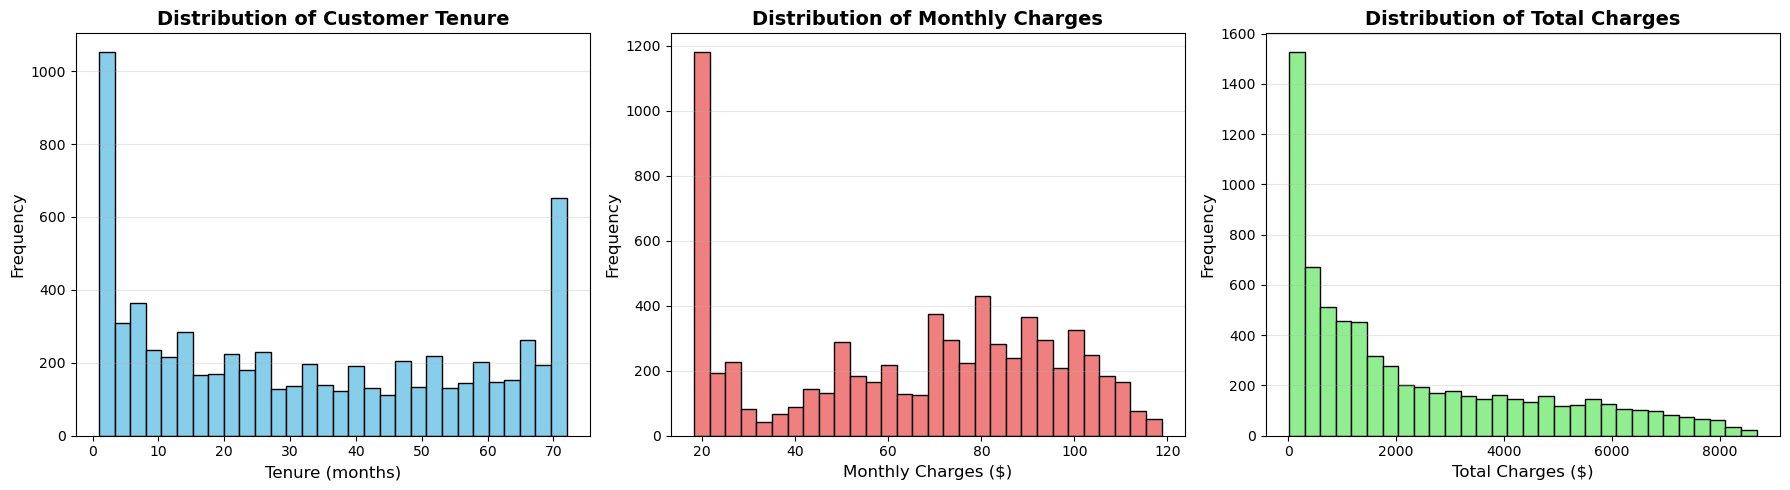

Distribution Statistics:
------------------------------------------------------------
tenure               - Skewness:   0.24, Kurtosis:  -1.39
MonthlyCharges       - Skewness:  -0.22, Kurtosis:  -1.26
TotalCharges         - Skewness:   0.96, Kurtosis:  -0.23
------------------------------------------------------------


In [18]:
# Visualize the distribution of key numerical features
# These features are critical for understanding customer behavior and churn patterns

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Tenure distribution - how long customers have been with the company
axes[0].hist(data['tenure'], bins=30, color='skyblue', edgecolor='black')
axes[0].set_xlabel('Tenure (months)', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_title('Distribution of Customer Tenure', fontsize=14, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)

# Monthly charges distribution - what customers pay per month
axes[1].hist(data['MonthlyCharges'], bins=30, color='lightcoral', edgecolor='black')
axes[1].set_xlabel('Monthly Charges ($)', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)
axes[1].set_title('Distribution of Monthly Charges', fontsize=14, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)

# Total charges distribution - cumulative amount paid
axes[2].hist(data['TotalCharges'], bins=30, color='lightgreen', edgecolor='black')
axes[2].set_xlabel('Total Charges ($)', fontsize=12)
axes[2].set_ylabel('Frequency', fontsize=12)
axes[2].set_title('Distribution of Total Charges', fontsize=14, fontweight='bold')
axes[2].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Calculate skewness and kurtosis to understand distribution shape
print("Distribution Statistics:")
print("-" * 60)
for col in ['tenure', 'MonthlyCharges', 'TotalCharges']:
    skew = data[col].skew()
    kurt = data[col].kurt()
    print(f"{col:20} - Skewness: {skew:6.2f}, Kurtosis: {kurt:6.2f}")
print("-" * 60)

**4.4 Numerical Features by Churn Status**

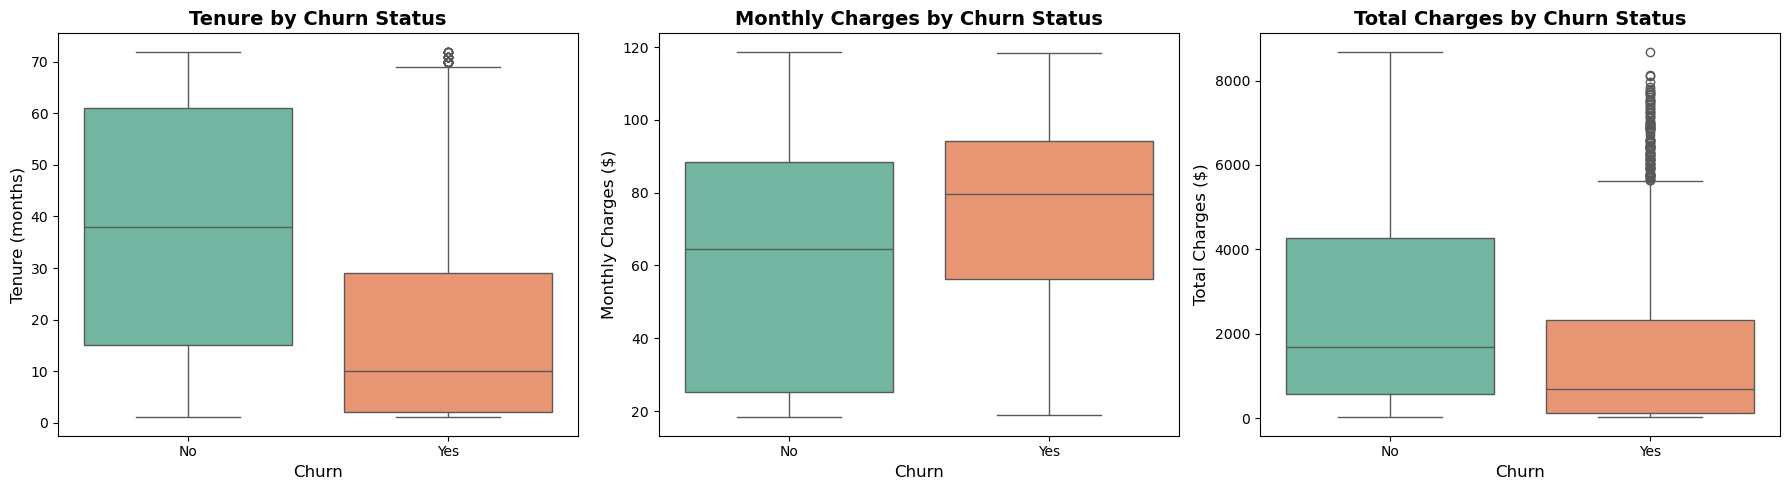


STATISTICAL COMPARISON: Churned vs Non-Churned Customers

Mean Values by Churn Status:
       tenure  MonthlyCharges  TotalCharges
Churn                                      
No      37.65           61.31       2555.34
Yes     17.98           74.44       1531.80

Median Values by Churn Status:
       tenure  MonthlyCharges  TotalCharges
Churn                                      
No       38.0           64.45       1683.60
Yes      10.0           79.65        703.55


In [19]:
# Compare numerical features between churned and retained customers
# Boxplots help identify differences in distributions and potential outliers

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Tenure comparison - do longer-tenured customers churn less?
sns.boxplot(x='Churn', y='tenure', data=data, palette='Set2', ax=axes[0])
axes[0].set_title('Tenure by Churn Status', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Churn', fontsize=12)
axes[0].set_ylabel('Tenure (months)', fontsize=12)

# Monthly charges comparison - do higher charges lead to more churn?
sns.boxplot(x='Churn', y='MonthlyCharges', data=data, palette='Set2', ax=axes[1])
axes[1].set_title('Monthly Charges by Churn Status', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Churn', fontsize=12)
axes[1].set_ylabel('Monthly Charges ($)', fontsize=12)

# Total charges comparison - relationship with customer lifetime value
sns.boxplot(x='Churn', y='TotalCharges', data=data, palette='Set2', ax=axes[2])
axes[2].set_title('Total Charges by Churn Status', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Churn', fontsize=12)
axes[2].set_ylabel('Total Charges ($)', fontsize=12)

plt.tight_layout()
plt.show()

# Statistical comparison between churned and non-churned customers
print("\n" + "="*70)
print("STATISTICAL COMPARISON: Churned vs Non-Churned Customers")
print("="*70)
print("\nMean Values by Churn Status:")
print(data.groupby('Churn')[['tenure', 'MonthlyCharges', 'TotalCharges']].mean().round(2))
print("\nMedian Values by Churn Status:")
print(data.groupby('Churn')[['tenure', 'MonthlyCharges', 'TotalCharges']].median().round(2))
print("="*70)

**4.5 Contract Type and Payment Method Analysis**

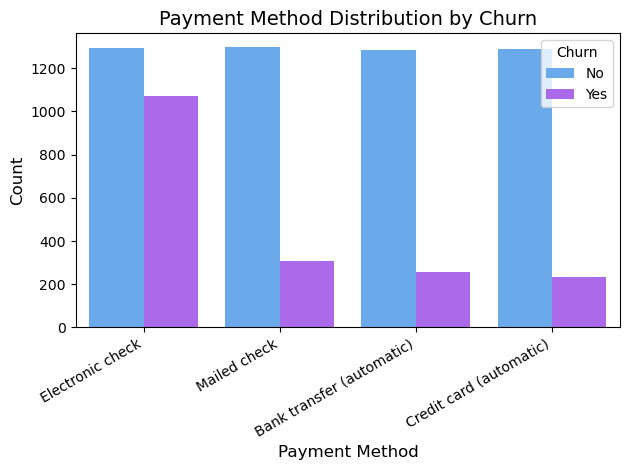

In [25]:

sns.countplot(data=data, x='PaymentMethod', hue='Churn',palette='cool')

plt.title('Payment Method Distribution by Churn', fontsize=14)
plt.xlabel('Payment Method', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=30, ha='right')
plt.legend(title='Churn')
plt.tight_layout()
plt.show()

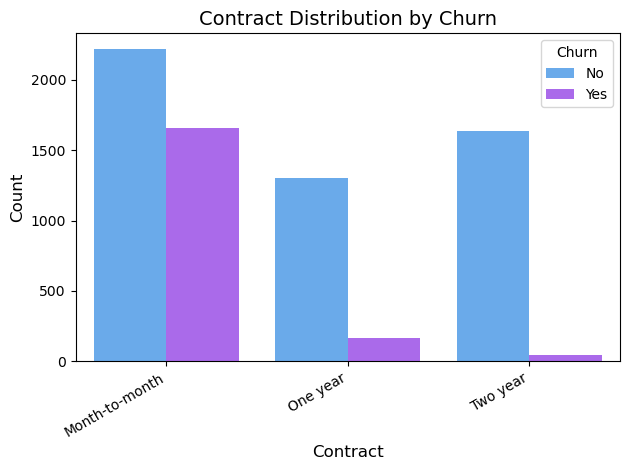

In [27]:
sns.countplot(data=data, x='Contract', hue='Churn',palette='cool')

plt.title('Contract Distribution by Churn', fontsize=14)
plt.xlabel('Contract', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=30, ha='right')
plt.legend(title='Churn')
plt.tight_layout()
plt.show()

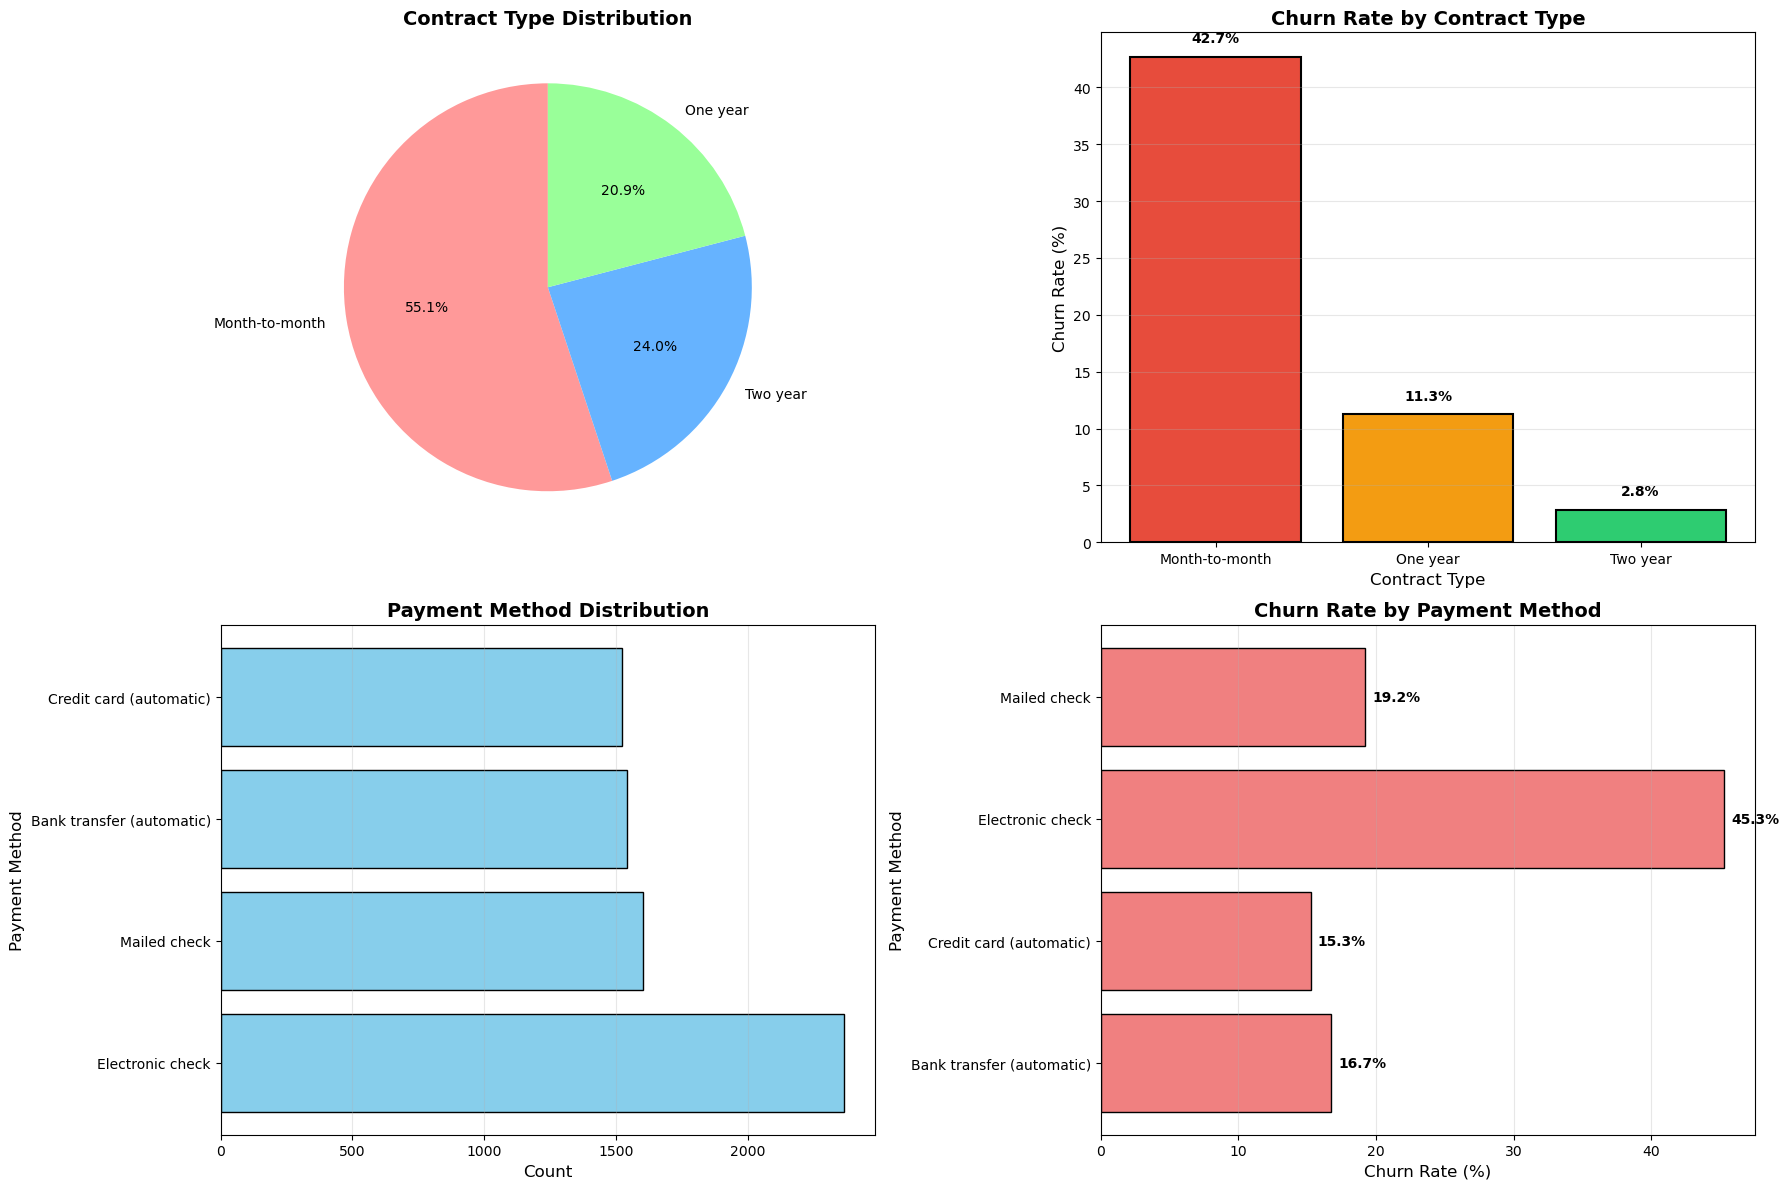


CONTRACT AND PAYMENT ANALYSIS

Churn Rate by Contract Type:
Contract
Month-to-month    42.71
One year          11.28
Two year           2.85
Name: Churn, dtype: float64

Churn Rate by Payment Method:
PaymentMethod
Bank transfer (automatic)    16.73
Credit card (automatic)      15.25
Electronic check             45.29
Mailed check                 19.20
Name: Churn, dtype: float64


In [ ]:
# Contract type and payment method are critical factors in customer retention
# Analyzing these helps understand commitment levels and payment preferences

fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Contract Type Distribution
contract_counts = data['Contract'].value_counts()
axes[0, 0].pie(contract_counts, labels=contract_counts.index, autopct='%1.1f%%',
               startangle=90, colors=['#ff9999', '#66b3ff', '#99ff99'])
axes[0, 0].set_title('Contract Type Distribution', fontsize=14, fontweight='bold')

# Churn Rate by Contract Type
contract_churn = data.groupby('Contract')['Churn'].apply(lambda x: (x == 'Yes').sum() / len(x) * 100)
bars = axes[0, 1].bar(contract_churn.index, contract_churn.values, color=['#e74c3c', '#f39c12', '#2ecc71'],
                      edgecolor='black', linewidth=1.5)
axes[0, 1].set_title('Churn Rate by Contract Type', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Contract Type', fontsize=12)
axes[0, 1].set_ylabel('Churn Rate (%)', fontsize=12)
axes[0, 1].grid(axis='y', alpha=0.3)
# Add value labels on bars
for i, (bar, val) in enumerate(zip(bars, contract_churn.values)):
    axes[0, 1].text(bar.get_x() + bar.get_width()/2, val + 1, f'{val:.1f}%',
                    ha='center', va='bottom', fontweight='bold')

# Payment Method Distribution
payment_counts = data['PaymentMethod'].value_counts()
axes[1, 0].barh(payment_counts.index, payment_counts.values, color='skyblue', edgecolor='black')
axes[1, 0].set_title('Payment Method Distribution', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Count', fontsize=12)
axes[1, 0].set_ylabel('Payment Method', fontsize=12)
axes[1, 0].grid(axis='x', alpha=0.3)

# Churn Rate by Payment Method
payment_churn = data.groupby('PaymentMethod')['Churn'].apply(lambda x: (x == 'Yes').sum() / len(x) * 100)
bars = axes[1, 1].barh(payment_churn.index, payment_churn.values, color='lightcoral', edgecolor='black')
axes[1, 1].set_title('Churn Rate by Payment Method', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Churn Rate (%)', fontsize=12)
axes[1, 1].set_ylabel('Payment Method', fontsize=12)
axes[1, 1].grid(axis='x', alpha=0.3)
# Add value labels on bars
for bar, val in zip(bars, payment_churn.values):
    axes[1, 1].text(val + 0.5, bar.get_y() + bar.get_height()/2, f'{val:.1f}%',
                    va='center', fontweight='bold')

plt.tight_layout()
plt.show()

# Detailed statistics
print("\n" + "="*70)
print("CONTRACT AND PAYMENT ANALYSIS")
print("="*70)
print("\nChurn Rate by Contract Type:")
print(contract_churn.round(2))
print("\nChurn Rate by Payment Method:")
print(payment_churn.round(2))
print("="*70)

**4.6 Internet Service and Add-on Services Deep Dive**

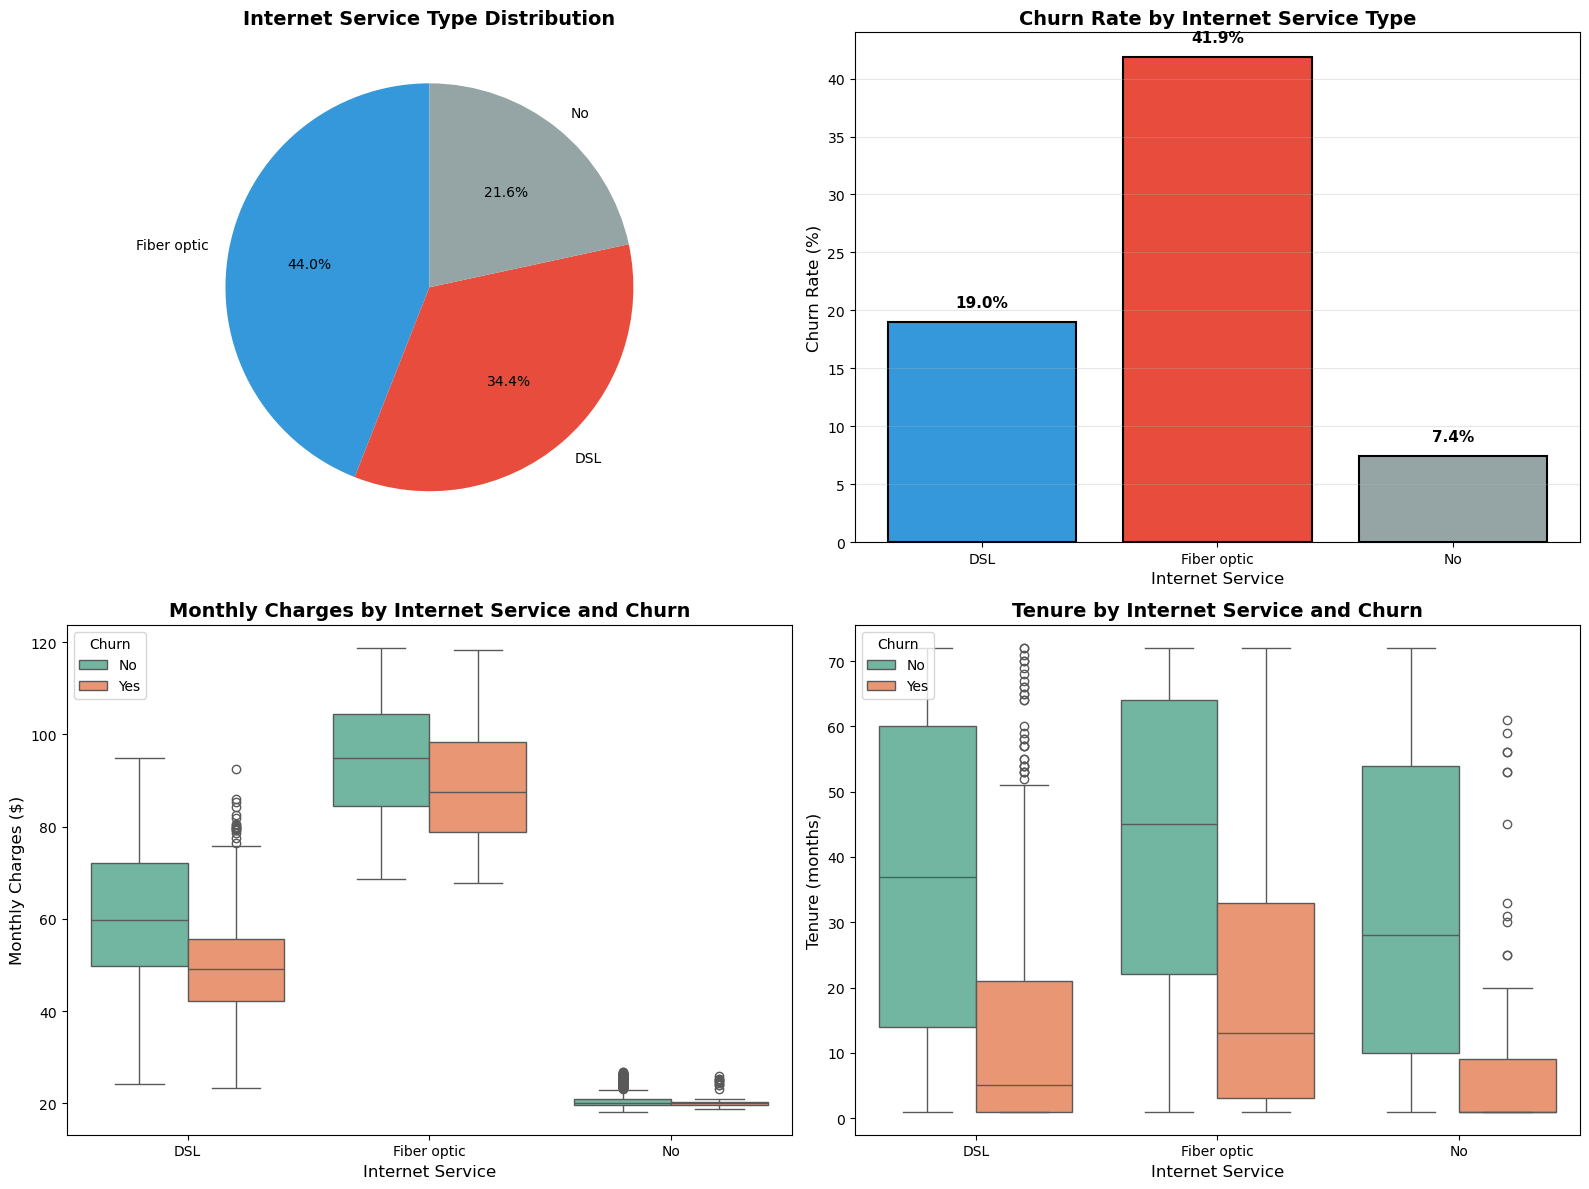


INTERNET ADD-ON SERVICES IMPACT ON CHURN

OnlineSecurity:
OnlineSecurity
No                     41.78
No internet service     7.43
Yes                    14.64
Name: Churn, dtype: float64

OnlineBackup:
OnlineBackup
No                     39.94
No internet service     7.43
Yes                    21.57
Name: Churn, dtype: float64

DeviceProtection:
DeviceProtection
No                     39.14
No internet service     7.43
Yes                    22.54
Name: Churn, dtype: float64

TechSupport:
TechSupport
No                     41.65
No internet service     7.43
Yes                    15.20
Name: Churn, dtype: float64


In [ ]:
# Focus on Internet Service type - it's often a key differentiator
# Fiber optic customers may have different behaviors than DSL customers

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Internet Service Distribution
internet_counts = data['InternetService'].value_counts()
colors = ['#3498db', '#e74c3c', '#95a5a6']
axes[0, 0].pie(internet_counts, labels=internet_counts.index, autopct='%1.1f%%',
               startangle=90, colors=colors)
axes[0, 0].set_title('Internet Service Type Distribution', fontsize=14, fontweight='bold')

# Churn Rate by Internet Service
internet_churn = data.groupby('InternetService')['Churn'].apply(lambda x: (x == 'Yes').sum() / len(x) * 100)
bars = axes[0, 1].bar(internet_churn.index, internet_churn.values, color=colors,
                      edgecolor='black', linewidth=1.5)
axes[0, 1].set_title('Churn Rate by Internet Service Type', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Internet Service', fontsize=12)
axes[0, 1].set_ylabel('Churn Rate (%)', fontsize=12)
axes[0, 1].grid(axis='y', alpha=0.3)
for bar, val in zip(bars, internet_churn.values):
    axes[0, 1].text(bar.get_x() + bar.get_width()/2, val + 1, f'{val:.1f}%',
                    ha='center', va='bottom', fontweight='bold', fontsize=11)

# Monthly Charges by Internet Service and Churn
sns.boxplot(x='InternetService', y='MonthlyCharges', hue='Churn', data=data,
            palette='Set2', ax=axes[1, 0])
axes[1, 0].set_title('Monthly Charges by Internet Service and Churn', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Internet Service', fontsize=12)
axes[1, 0].set_ylabel('Monthly Charges ($)', fontsize=12)
axes[1, 0].legend(title='Churn', loc='upper left')

# Tenure by Internet Service and Churn
sns.boxplot(x='InternetService', y='tenure', hue='Churn', data=data,
            palette='Set2', ax=axes[1, 1])
axes[1, 1].set_title('Tenure by Internet Service and Churn', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Internet Service', fontsize=12)
axes[1, 1].set_ylabel('Tenure (months)', fontsize=12)
axes[1, 1].legend(title='Churn', loc='upper left')

plt.tight_layout()
plt.show()

# Security and support services analysis - customers with add-ons
print("\n" + "="*70)
print("INTERNET ADD-ON SERVICES IMPACT ON CHURN")
print("="*70)

addon_services = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport']
for service in addon_services:
    print(f"\n{service}:")
    service_churn = data.groupby(service)['Churn'].apply(lambda x: (x == 'Yes').sum() / len(x) * 100)
    print(service_churn.round(2))
print("="*70)

**4.7 Key Insights Summary**

In [ ]:
# Comprehensive summary of key findings from EDA
# This helps inform feature engineering and model selection

print("\n" + "="*80)
print(" " * 20 + "EXPLORATORY DATA ANALYSIS - KEY INSIGHTS")
print("="*80)

# 1. Dataset Overview
print("\n1. DATASET OVERVIEW:")
print(f"   - Total Customers: {len(data):,}")
print(f"   - Total Features: {len(data.columns)}")
print(f"   - Numerical Features: {len(data.select_dtypes(include=[np.number]).columns)}")
print(f"   - Categorical Features: {len(data.select_dtypes(include='object').columns)}")

# 2. Target Variable
churn_counts = data['Churn'].value_counts()
churn_pct = (churn_counts / len(data) * 100).round(2)
print("\n2. TARGET VARIABLE (CHURN):")
print(f"   - No Churn: {churn_counts['No']:,} ({churn_pct['No']}%)")
print(f"   - Churn: {churn_counts['Yes']:,} ({churn_pct['Yes']}%)")
print(f"   - Class Imbalance: {'Yes - consider SMOTE or class weighting' if churn_pct['Yes'] < 40 else 'Relatively balanced'}")

# 3. High-Risk Churn Factors
print("\n3. HIGH-RISK CHURN FACTORS:")
print("   Contract Type:")
contract_churn = data.groupby('Contract')['Churn'].apply(lambda x: (x == 'Yes').sum() / len(x) * 100)
for contract, rate in contract_churn.items():
    print(f"      - {contract}: {rate:.1f}% churn rate")

print("\n   Payment Method:")
payment_churn = data.groupby('PaymentMethod')['Churn'].apply(lambda x: (x == 'Yes').sum() / len(x) * 100)
for payment, rate in payment_churn.nlargest(2).items():
    print(f"      - {payment}: {rate:.1f}% churn rate")

print("\n   Internet Service:")
internet_churn = data.groupby('InternetService')['Churn'].apply(lambda x: (x == 'Yes').sum() / len(x) * 100)
for service, rate in internet_churn.items():
    print(f"      - {service}: {rate:.1f}% churn rate")

# 4. Tenure Analysis
print("\n4. TENURE INSIGHTS:")
tenure_churn = data.groupby('Churn')['tenure'].mean()
print(f"   - Average tenure (No Churn): {tenure_churn['No']:.1f} months")
print(f"   - Average tenure (Churn): {tenure_churn['Yes']:.1f} months")
print(f"   - Difference: {abs(tenure_churn['No'] - tenure_churn['Yes']):.1f} months")
print(f"   - Insight: {'Shorter tenure customers are at higher risk' if tenure_churn['Yes'] < tenure_churn['No'] else 'Longer tenure customers are at higher risk'}")

# 5. Charges Analysis
print("\n5. MONTHLY CHARGES INSIGHTS:")
charges_churn = data.groupby('Churn')['MonthlyCharges'].mean()
print(f"   - Average monthly charges (No Churn): ${charges_churn['No']:.2f}")
print(f"   - Average monthly charges (Churn): ${charges_churn['Yes']:.2f}")
print(f"   - Difference: ${abs(charges_churn['No'] - charges_churn['Yes']):.2f}")
print(f"   - Insight: {'Higher charges associated with churn' if charges_churn['Yes'] > charges_churn['No'] else 'Lower charges associated with churn'}")

# 6. Demographics
print("\n6. DEMOGRAPHIC INSIGHTS:")
senior_churn = data.groupby('SeniorCitizen')['Churn'].apply(lambda x: (x == 'Yes').sum() / len(x) * 100)
print(f"   - Senior Citizens: {senior_churn[1]:.1f}% churn rate")
print(f"   - Non-Senior Citizens: {senior_churn[0]:.1f}% churn rate")

# Note: Partner column was removed in data cleaning step, so Partner analysis is not available

# 7. Recommendations
print("\n7. RECOMMENDATIONS FOR RETENTION:")
print("   ✓ Focus on Month-to-month contract customers")
print("   ✓ Offer incentives for Electronic check users to switch payment methods")
print("   ✓ Promote add-on services (OnlineSecurity, TechSupport) to reduce churn")
print("   ✓ Target new customers (tenure < 12 months) with engagement programs")
print("   ✓ Provide special attention to Fiber optic customers with high monthly charges")
print("   ✓ Consider loyalty programs for senior citizens")

print("\n" + "="*80)
print(" " * 25 + "END OF EDA INSIGHTS")
print("="*80 + "\n")


                    EXPLORATORY DATA ANALYSIS - KEY INSIGHTS

1. DATASET OVERVIEW:
   - Total Customers: 7,032
   - Total Features: 18
   - Numerical Features: 4
   - Categorical Features: 14

2. TARGET VARIABLE (CHURN):
   - No Churn: 5,163 (73.42%)
   - Churn: 1,869 (26.58%)
   - Class Imbalance: Yes - consider SMOTE or class weighting

3. HIGH-RISK CHURN FACTORS:
   Contract Type:
      - Month-to-month: 42.7% churn rate
      - One year: 11.3% churn rate
      - Two year: 2.8% churn rate

   Payment Method:
      - Electronic check: 45.3% churn rate
      - Mailed check: 19.2% churn rate

   Internet Service:
      - DSL: 19.0% churn rate
      - Fiber optic: 41.9% churn rate
      - No: 7.4% churn rate

4. TENURE INSIGHTS:
   - Average tenure (No Churn): 37.7 months
   - Average tenure (Churn): 18.0 months
   - Difference: 19.7 months
   - Insight: Shorter tenure customers are at higher risk

5. MONTHLY CHARGES INSIGHTS:
   - Average monthly charges (No Churn): $61.31
   - Averag

## **5. Target Variable Analysis**

**5.1 Churn Distribution**

Churn
No     73.4
Yes    26.6
Name: count, dtype: float64


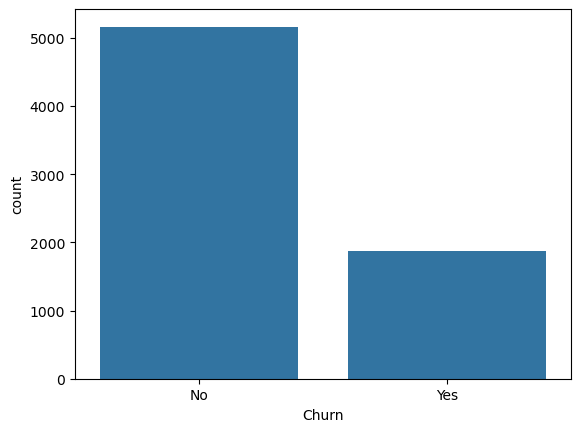

In [ ]:
# Calculate churn percentage
print(np.round((data['Churn'].value_counts()/len(data['Churn'])) * 100, 1))

# Visualize churn distribution
sns.countplot(x=data.Churn)
plt.show()

**Key Finding:**

- Class imbalance detected
- Approximately 73.5% No (retained) vs 26.5% Yes (churned)
- Important: This imbalance may require special handling in modeling (SMOTE, Class weights, etc...)

## **6. Numerical Features Analysis**

In [ ]:
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

**6.1 Pairplot - Overall Relationships**

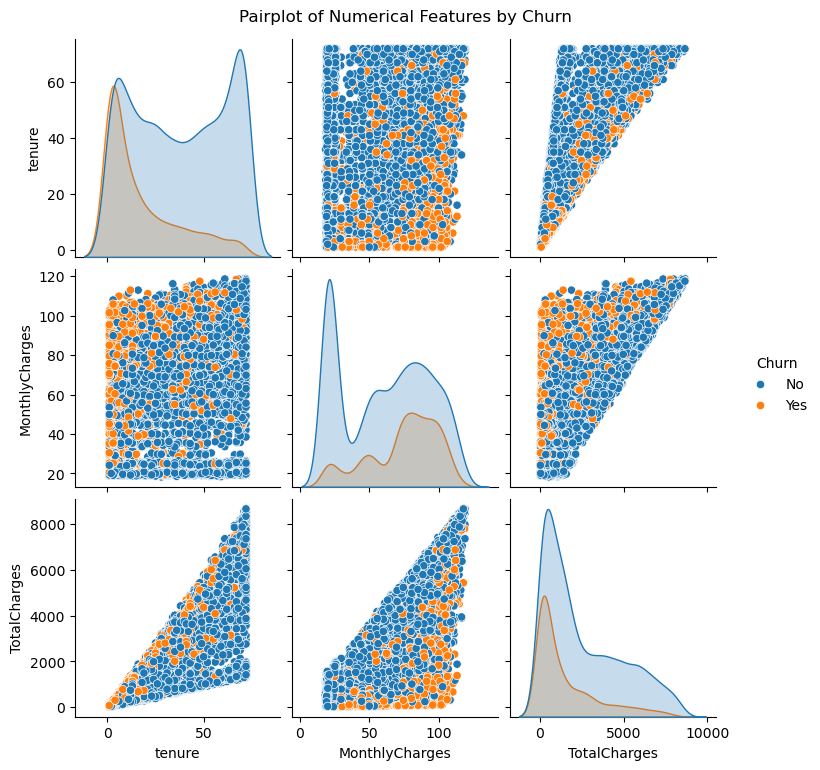

In [ ]:
# Shows correlations between numerical features
sns.pairplot(data[num_cols + ['Churn']], hue='Churn', diag_kind='kde')
plt.suptitle("Pairplot of Numerical Features by Churn", y=1.02)
plt.show()

**6.2 Tenure Distribution**

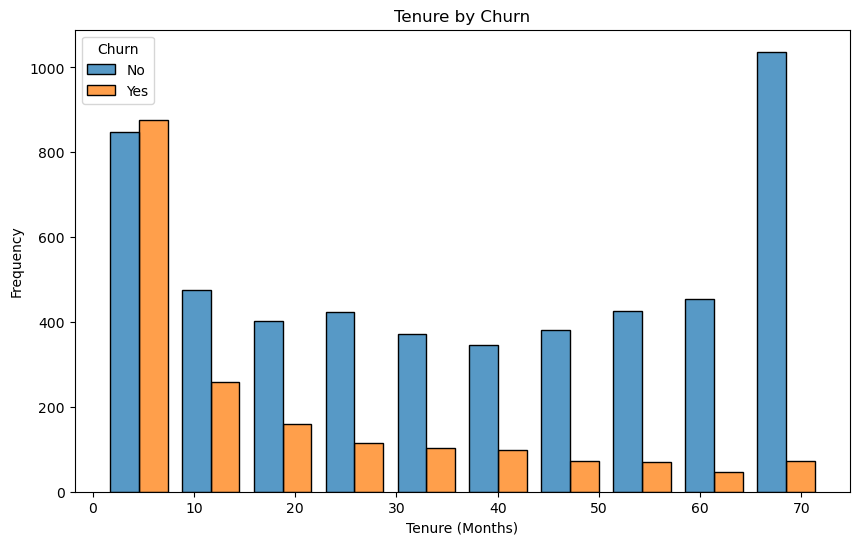

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='tenure', hue='Churn', bins=10, multiple='dodge', shrink=0.8)
plt.title('Tenure by Churn')
plt.xlabel('Tenure (Months)')
plt.ylabel('Frequency')
plt.show()

**Key Observation:**

- Customers with shorter tenure (0-10 months) have higher churn rates
- Long-tenure customers (60+ months) are more loyal
- Action: Focus retention efforts on new customers

**6.3 Monthly Charges Distribution**

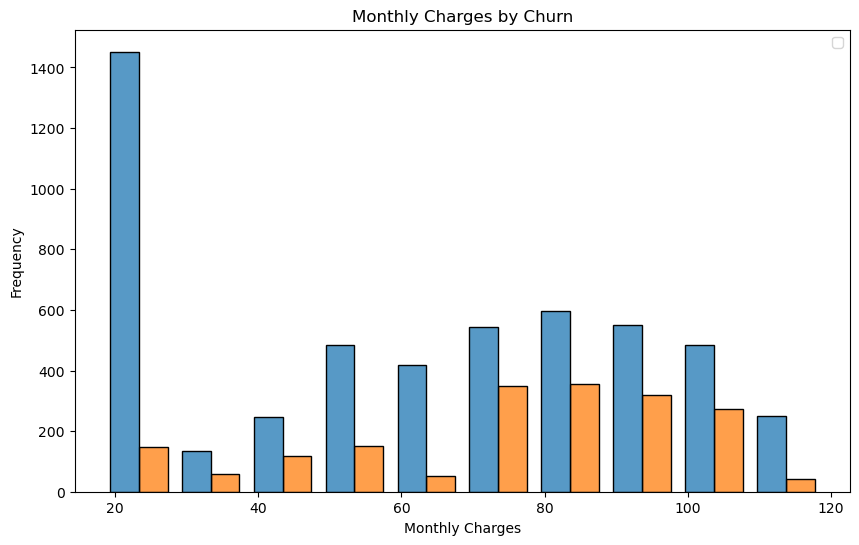

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='MonthlyCharges', hue='Churn', bins=10, multiple='dodge', shrink=0.8)
plt.title('Monthly Charges by Churn')
plt.xlabel('Monthly Charges')
plt.ylabel('Frequency')
plt.legend()
plt.show()

**Key Observation:**

- Customers with higher monthly charges tend to churn more
- Low-cost plans ($20-40) have better retention
- Implication: Price sensitivity may be a churn factor

**6.4 Total Charges Distribution**

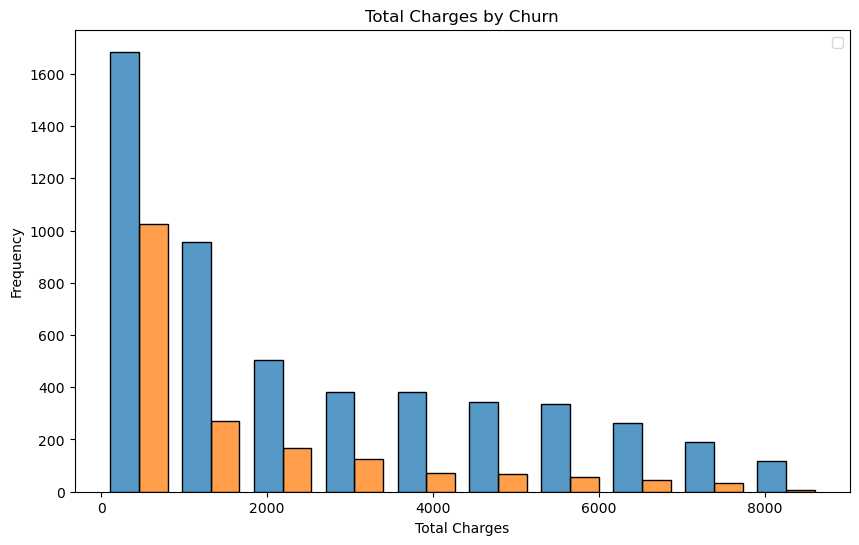

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='TotalCharges', hue='Churn', bins=10, multiple='dodge', shrink=0.8)
plt.title('Total Charges by Churn')
plt.xlabel('Total Charges')
plt.ylabel('Frequency')
plt.legend()
plt.show()

**Key Observation:**

- Lower total charges correlate with higher churn
related to shorter tenure
- Customers who invest more over time tend to stay

## **7. Categorical Features Analysis**

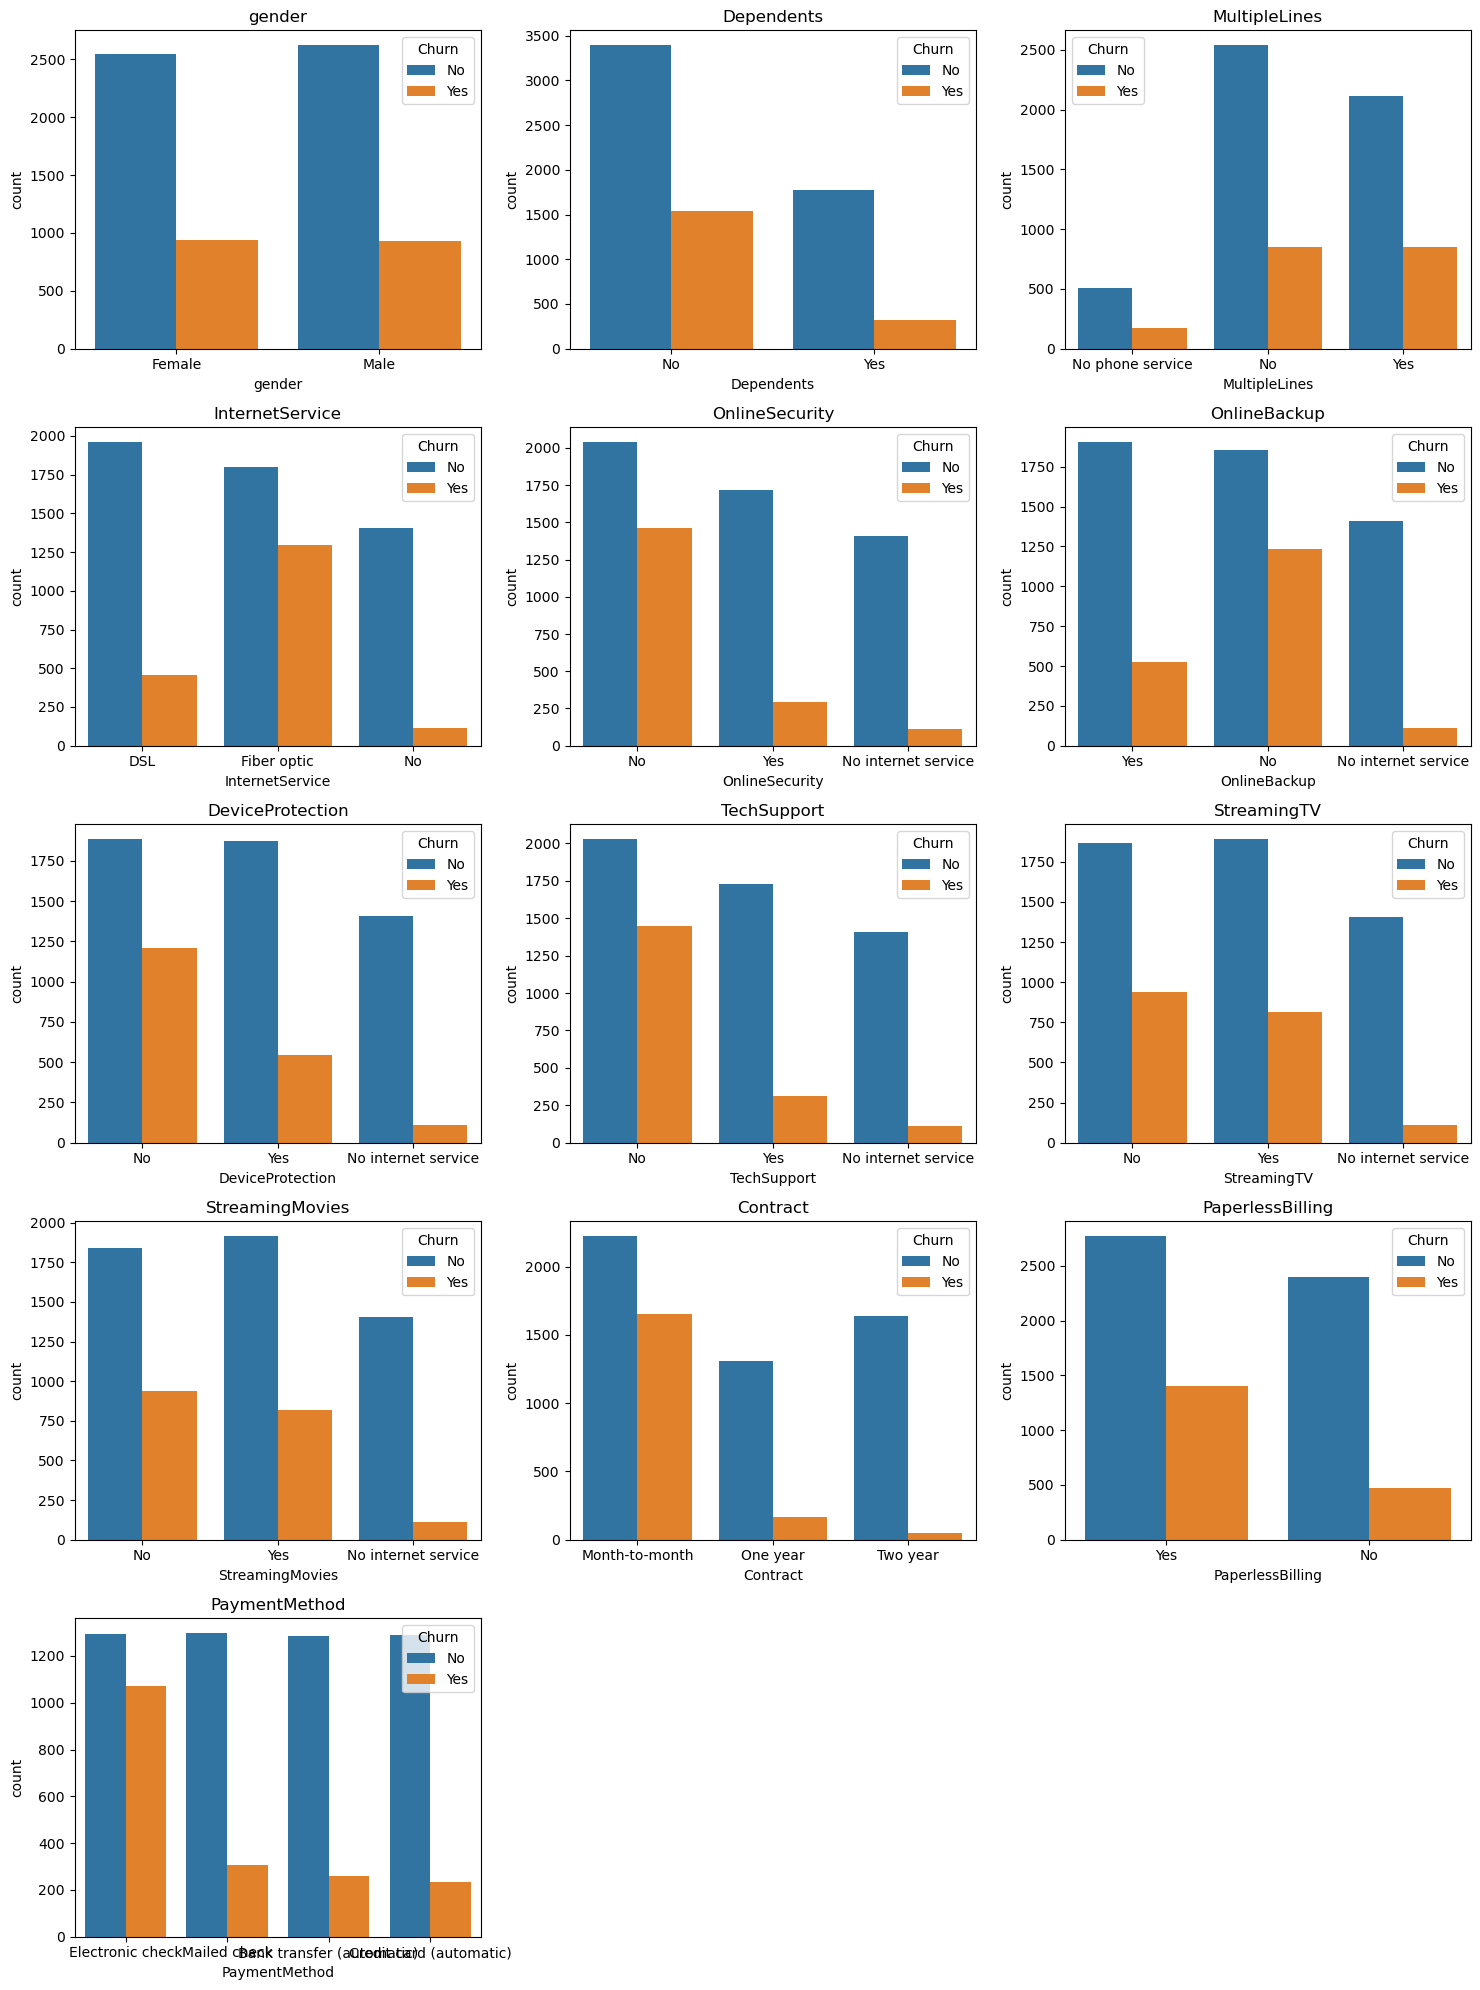

In [ ]:
plot_cols = cat_cols.drop('Churn')

n_cols = 3
n_rows = int(np.ceil(len(plot_cols) / n_cols))

plt.figure(figsize=(n_cols*5, n_rows*4))

for i, predictor in enumerate(plot_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.countplot(data=data, x=predictor, hue='Churn')
    plt.title(predictor)

plt.tight_layout()
plt.show()

**Expected Insights from Categorical Features:**

- Contract Type: Month-to-month contracts likely show highest churn
- Internet Service: Fiber optic users may have higher churn (possibly due to price)
- Payment Method: Electronic payments may correlate with retention
- Services: Customers without add-on services (OnlineSecurity, TechSupport) may churn more

## **8. Correlation Matrix**

In [ ]:
# Encoding binary cols
binary_cols = [ 'Dependents', 'PaperlessBilling', 'Churn']
for col in binary_cols:
    data[col] = data[col].map({'Yes': 1, 'No': 0})

data['gender'] = data['gender'].map({'Female': 0, 'Male': 1})

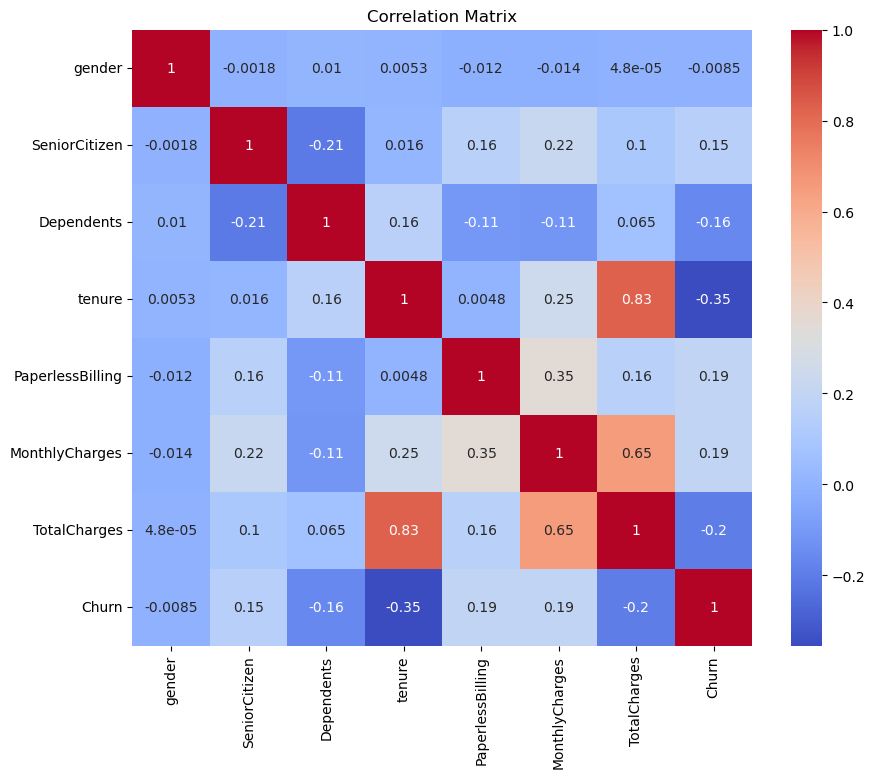

In [ ]:
corr = data.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Nominal columns: One-hot encode
nominal_cols = ['Contract', 'MultipleLines', 'InternetService', 'OnlineSecurity',
                'OnlineBackup', 'DeviceProtection', 'TechSupport',
                'StreamingTV', 'StreamingMovies', 'PaymentMethod']

data = pd.get_dummies(data, columns=nominal_cols, drop_first=False)

## **9. Modeling**

**9.1 Spliting the data**

In [ ]:
# Separate features and target
X = data.drop('Churn', axis=1)
y = data['Churn']

In [ ]:
# data into train and split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=74, stratify=y)

In [ ]:
# Show the shapes of X_train, X_test, etc...
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5625, 38), (1407, 38), (5625,), (1407,))

### **Without Handling Imbalance**

**Define models and hyperparameters**

In [ ]:
# Create a list of models to evaluate with their hyperparameters
models = {
    "Logistic Regression": (
        LogisticRegression(random_state=42, class_weight="balanced", solver="liblinear"),
        {"model__C": [0.1, 1, 10], "model__penalty": ["l1", "l2"]}
    ),
    "K-Nearest Neighbors": (
        KNeighborsClassifier(),
        {"model__n_neighbors": [3, 5, 7], "model__weights": ["uniform", "distance"]}
    ),
    "Support Vector Machine": (
        SVC(random_state=42, class_weight="balanced"),
        {"model__C": [0.5, 1, 5], "model__gamma": ["scale", "auto"]}
    ),
    "Random Forest": (
        RandomForestClassifier(random_state=42),
        {"model__n_estimators": [50, 100, 200], "model__max_depth": [None, 10, 20]}
    ),
    "Gradient Boosting": (
        GradientBoostingClassifier(random_state=42),
        {"model__n_estimators": [50, 100, 200], "model__learning_rate": [0.05, 0.03, 0.1, 0.3, .5]}
    ),
    "Decision Tree": (
        DecisionTreeClassifier(random_state=42),
        {"model__max_depth": [None, 10, 20], "model__min_samples_split": [2, 5]}
    ),
    "AdaBoost": (
        AdaBoostClassifier(random_state=42),
        {"model__n_estimators": [50, 100], "model__learning_rate": [0.05, 0.1]}
    ),
    "XGBoost": (
        XGBClassifier(random_state=42, use_label_encoder=False, eval_metric="logloss"),
        {"model__n_estimators": [100, 200], "model__learning_rate": [0.05, 0.1]}
    )
}

**Train and evaluate models**

In [ ]:
# Initialize variables
results = []
top_model = None
top_score = 0.0

for name, (model, param_grid) in models.items():
    print("="*60, "\n")
    print(f"Training: {name}")

    # Build pipeline (scaling + model)
    pipe = Pipeline([
        ("scaler", MinMaxScaler()),
        ("model", model)
    ])

    # GridSearchCV if params exist
    if param_grid:
        search = GridSearchCV(pipe, param_grid, cv=3, n_jobs=-1, scoring="accuracy")
        search.fit(X_train, y_train)
        pipe = search.best_estimator_
    else:
        pipe.fit(X_train, y_train)

    # Predictions
    y_train_pred = pipe.predict(X_train)
    y_test_pred  = pipe.predict(X_test)

    # Metrics
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc  = accuracy_score(y_test, y_test_pred)

    # Save results
    results.append({
        "Model": name,
        "Train Accuracy": train_acc,
        "Test Accuracy": test_acc
    })

    # Print summary for each model
    print(f"✔ Training Accuracy: {train_acc:.2f}")
    print(f"✔ Testing Accuracy : {test_acc:.2f}")
    print("Classification Report (Test Data):")
    print(classification_report(y_test, y_test_pred, zero_division=0))
    print("Confusion Matrix (Test Data):")
    print(confusion_matrix(y_test, y_test_pred))
    print()

    # Track best model (based on test accuracy)
    if test_acc > top_score:
        top_score = test_acc
        top_model = pipe

# Convert results to DataFrame
results_df = pd.DataFrame(results).sort_values(by="Test Accuracy", ascending=False)


Training: Logistic Regression
✔ Training Accuracy: 0.75
✔ Testing Accuracy : 0.76
Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.91      0.74      0.82      1033
           1       0.53      0.80      0.64       374

    accuracy                           0.76      1407
   macro avg       0.72      0.77      0.73      1407
weighted avg       0.81      0.76      0.77      1407

Confusion Matrix (Test Data):
[[763 270]
 [ 74 300]]


Training: K-Nearest Neighbors
✔ Training Accuracy: 0.82
✔ Testing Accuracy : 0.77
Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1033
           1       0.56      0.52      0.54       374

    accuracy                           0.77      1407
   macro avg       0.70      0.69      0.69      1407
weighted avg       0.76      0.77      0.76      1407

Confusion Matrix (Test Data):
[[882 151]
 [178 196]]


T

/home/elnagar74/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/elnagar74/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/elnagar74/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/elnagar74/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circum

✔ Training Accuracy: 0.80
✔ Testing Accuracy : 0.80
Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1033
           1       0.68      0.48      0.56       374

    accuracy                           0.80      1407
   macro avg       0.76      0.70      0.72      1407
weighted avg       0.79      0.80      0.79      1407

Confusion Matrix (Test Data):
[[951  82]
 [196 178]]


Training: XGBoost


/home/elnagar74/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [09:11:51] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/elnagar74/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [09:11:51] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/elnagar74/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [09:11:51] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/elnagar74/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [09:11:51] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/elnagar74/anaconda3/lib/python3.12

✔ Training Accuracy: 0.85
✔ Testing Accuracy : 0.80
Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1033
           1       0.65      0.53      0.58       374

    accuracy                           0.80      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.79      0.80      0.79      1407

Confusion Matrix (Test Data):
[[925 108]
 [176 198]]



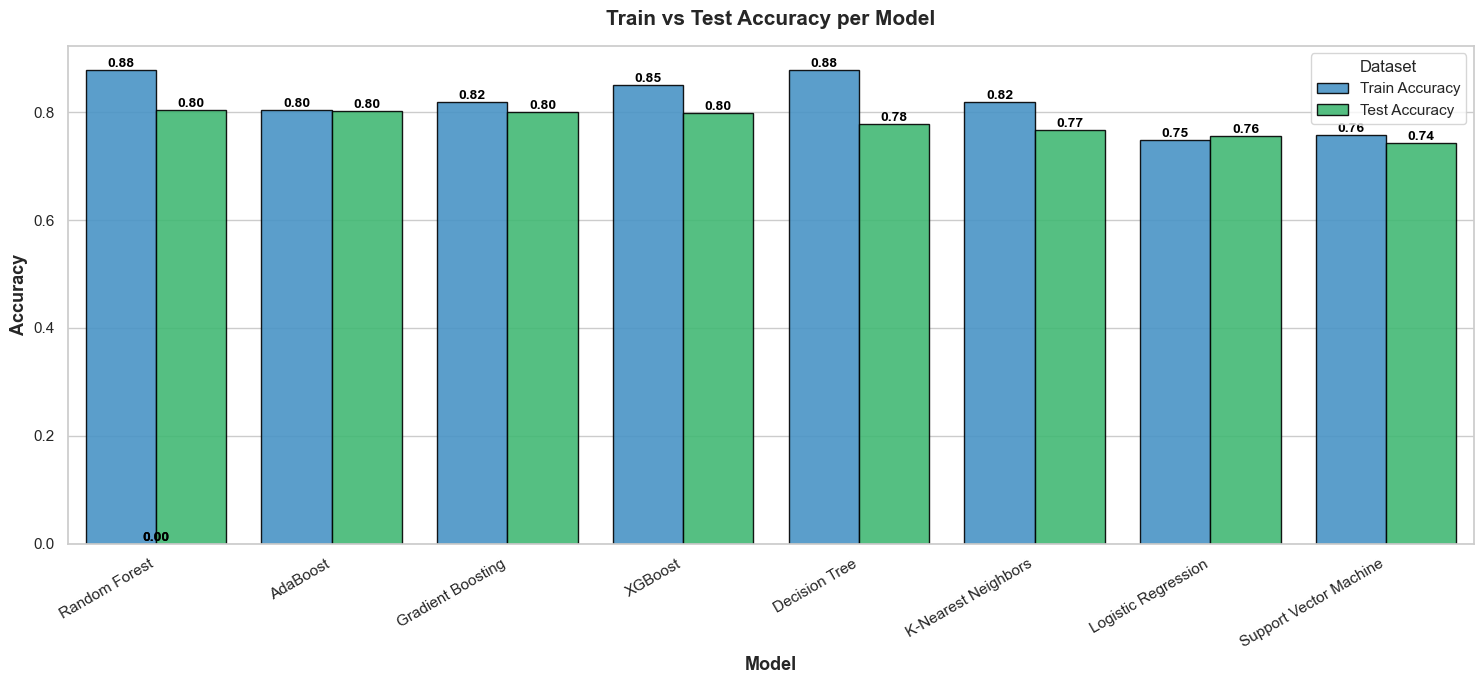

In [ ]:
# Plot train vs test accuracy
plt.figure(figsize=(15,7))
sns.set_theme(style="whitegrid")

# Melt results for seaborn
melted = results_df.melt(id_vars="Model",
                         value_vars=["Train Accuracy","Test Accuracy"],
                         var_name="Dataset", value_name="Accuracy")

# Ploting
sns.barplot(data=melted, x="Model", y="Accuracy", hue="Dataset",
            palette=["#3498db","#2ecc71"], alpha=0.9, edgecolor="black")
plt.xticks(rotation=30, ha="right", fontsize=11)
plt.yticks(fontsize=11)
plt.xlabel("Model", fontsize=13, weight="bold")
plt.ylabel("Accuracy", fontsize=13, weight="bold")
plt.title("Train vs Test Accuracy per Model", fontsize=15, weight="bold", pad=15)

# Show values on top of bars
for p in plt.gca().patches:
    plt.gca().annotate(f"{p.get_height():.2f}",
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha="center", va="bottom",
                       fontsize=10, fontweight="bold", color="black", rotation=0)

plt.legend(title="Dataset", fontsize=11)
plt.tight_layout()
plt.show()

#### **Machine Learning Model Accuracy Insights**

The models generally show accuracy, with both Train and Test Accuracy typically ranging from 75% to 87%.

#### **Top Models by Test Accuracy**
1. Random Forest: 80%
2. Gradient Boosting: 80%
3. XGBoost: 80%
4. AdaBoost: 80%

#### **Key Takeaways**

• **Random Forest and Decision Tree** achieve the highest training accuracy but are the most prone to overfitting.

• **Ensemble methods like Random Forest, Gradient Boosting, and XGBoost** generally perform very well on the test set.

• **AdaBoost and Logistic Regression** are excellent in terms of generalization, with no apparent overfitting.

### **With Handling Imbalance**

In [ ]:
# Resampling to handle imbalance
sm = SMOTEENN()
X_res, y_res = sm.fit_resample(X, y)

In [ ]:
# Split the resampled data
Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

In [ ]:
# Create a list of models to evaluate with their hyperparameters
models = [
    ('Random Forest', RandomForestClassifier(random_state=42),
        {'n_estimators': [50, 100, 200],
         'max_depth': [None, 10, 20]}),

    ('Gradient Boosting', GradientBoostingClassifier(random_state=42),
        {'n_estimators': [50, 100, 200],
         'learning_rate': [0.05, 0.1, 0.5]}),

    ('Support Vector Machine', SVC(random_state=42, class_weight='balanced'),
        {'C': [0.1, 1, 10],
         'gamma': ['scale', 'auto']}),

    ('Logistic Regression', LogisticRegression(random_state=42, class_weight='balanced', solver='liblinear'),
        {'C': [0.1, 1, 10],
         'penalty': ['l1', 'l2']}),

    ('K-Nearest Neighbors', KNeighborsClassifier(),
        {'n_neighbors': [3, 5, 7],
         'weights': ['uniform', 'distance']}),

    ('Decision Tree', DecisionTreeClassifier(random_state=42),
        {'max_depth': [None, 10, 20],
         'min_samples_split': [2, 5, 10]}),

    ('Ada Boost', AdaBoostClassifier(random_state=42),
        {'n_estimators': [50, 100, 200],
         'learning_rate': [0.05, 0.1, 0.5]}),

    ('XG Boost', XGBClassifier(random_state=42),
        {'max_depth': [3, 4, 5],
         'learning_rate': [0.01, 0.05, 0.1],
         'n_estimators': [100, 200, 300],
         'subsample': [0.8, 1.0]})
]

In [ ]:
# Initialize variables
model_scores = []
best_model = None
best_accuracy = 0.0

# Iterate over the models and evaluate their performance
for name, model, param_grid in models:
    # Pipeline
    pipeline = Pipeline([
        ('scaler', MinMaxScaler()),  # Scaling before model
        ('model', model)
    ])

    # Apply GridSearchCV if params exist
    if param_grid:
        grid_search = GridSearchCV(model, param_grid, cv=3, n_jobs=-1, verbose=0)
        grid_search.fit(Xr_train, yr_train)
        best_estimator = grid_search.best_estimator_
    else:
        model.fit(Xr_train, yr_train)
        best_estimator = model

    # Fit the model
    best_estimator.fit(Xr_train, yr_train)

    # Predictions (train + test)
    y_train_pred = best_estimator.predict(Xr_train)
    y_test_pred = best_estimator.predict(Xr_test)

    # Accuracies
    train_accuracy = accuracy_score(yr_train, y_train_pred)
    test_accuracy = accuracy_score(yr_test, y_test_pred)

    model_scores.append({'Model': name,
                         'Train Accuracy': train_accuracy,
                         'Test Accuracy': test_accuracy})

    print(f"Model: {name}")
    print(f"Best Params: {grid_search.best_params_ if param_grid else 'Default'}")
    print(f"Train Accuracy: {train_accuracy*100:.2f}%")
    print(f"Test Accuracy: {test_accuracy*100:.2f}%")
    print("-"*40)

    if test_accuracy > best_accuracy:
        best_accuracy = test_accuracy
        best_model = best_estimator

# Convert results to DataFrame
scores_df = pd.DataFrame(model_scores)

print("\nOverall Best Model:")
print(f"Model: {scores_df.loc[scores_df['Test Accuracy'].idxmax(), 'Model']}")
print(f"Accuracy: {best_accuracy*100:.2f}%")

Model: Random Forest
Best Params: {'max_depth': 20, 'n_estimators': 200}
Train Accuracy: 100.00%
Test Accuracy: 95.79%
----------------------------------------
Model: Gradient Boosting
Best Params: {'learning_rate': 0.5, 'n_estimators': 100}
Train Accuracy: 99.68%
Test Accuracy: 95.96%
----------------------------------------
Model: Support Vector Machine
Best Params: {'C': 10, 'gamma': 'auto'}
Train Accuracy: 99.89%
Test Accuracy: 98.37%
----------------------------------------
Model: Logistic Regression
Best Params: {'C': 10, 'penalty': 'l1'}
Train Accuracy: 94.35%
Test Accuracy: 94.50%
----------------------------------------
Model: K-Nearest Neighbors
Best Params: {'n_neighbors': 3, 'weights': 'distance'}
Train Accuracy: 100.00%
Test Accuracy: 98.28%
----------------------------------------
Model: Decision Tree
Best Params: {'max_depth': 10, 'min_samples_split': 10}
Train Accuracy: 97.01%
Test Accuracy: 92.70%
----------------------------------------


/home/elnagar74/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/elnagar74/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/elnagar74/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/elnagar74/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circum

Model: Ada Boost
Best Params: {'learning_rate': 0.5, 'n_estimators': 200}
Train Accuracy: 95.08%
Test Accuracy: 95.10%
----------------------------------------
Model: XG Boost
Best Params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.8}
Train Accuracy: 97.74%
Test Accuracy: 95.27%
----------------------------------------

Overall Best Model:
Model: Support Vector Machine
Accuracy: 98.37%


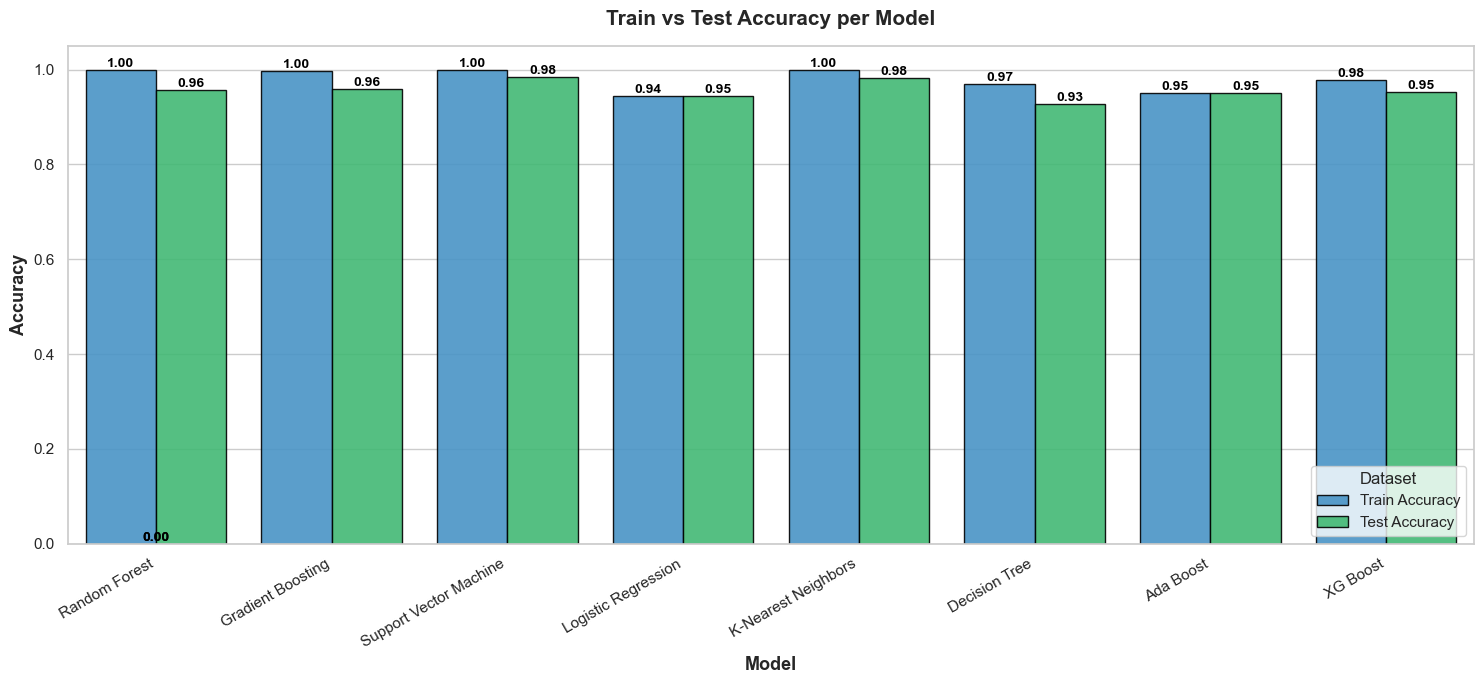

In [ ]:
# Plot train vs test accuracy
plt.figure(figsize=(15,7))
sns.set_theme(style="whitegrid")

# Melt results for seaborn
melted = scores_df.melt(id_vars="Model",
                         value_vars=["Train Accuracy","Test Accuracy"],
                         var_name="Dataset", value_name="Accuracy")

# Ploting
sns.barplot(data=melted, x="Model", y="Accuracy", hue="Dataset",
            palette=["#3498db","#2ecc71"], alpha=0.9, edgecolor="black")
plt.xticks(rotation=30, ha="right", fontsize=11)
plt.yticks(fontsize=11)
plt.xlabel("Model", fontsize=13, weight="bold")
plt.ylabel("Accuracy", fontsize=13, weight="bold")
plt.title("Train vs Test Accuracy per Model", fontsize=15, weight="bold", pad=15)

# Show values on top of bars
for p in plt.gca().patches:
    plt.gca().annotate(f"{p.get_height():.2f}",
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha="center", va="bottom",
                       fontsize=10, fontweight="bold", color="black", rotation=0)

plt.legend(title="Dataset", fontsize=11)
plt.tight_layout()
plt.show()

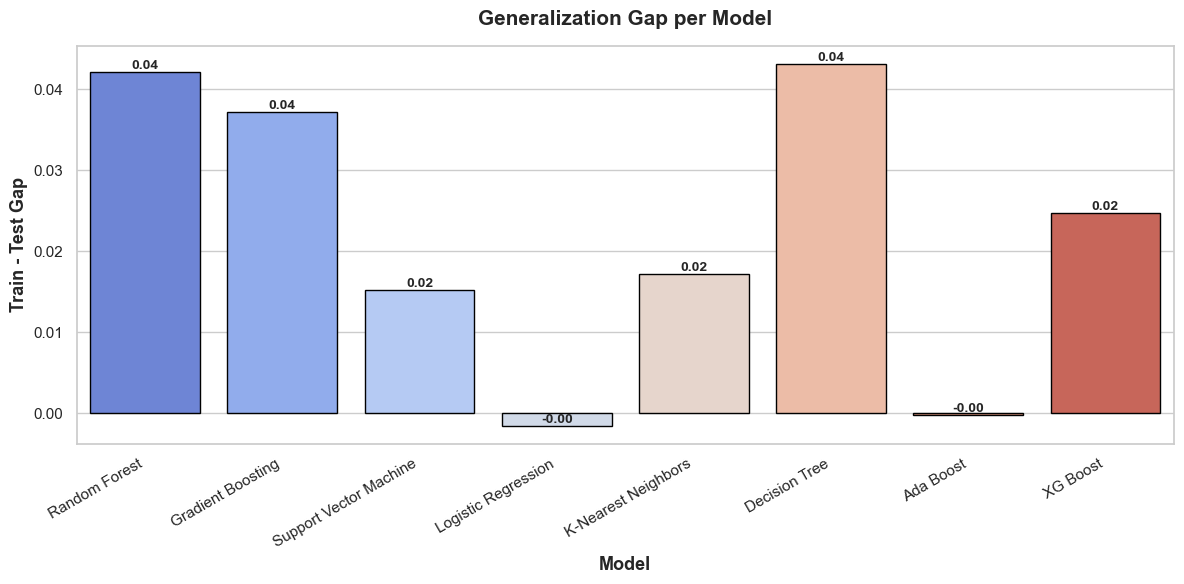

In [ ]:
# Show generalization gap
scores_df["Gap"] = scores_df["Train Accuracy"] - scores_df["Test Accuracy"]

plt.figure(figsize=(12,6))
sns.barplot(data=scores_df, x="Model", y="Gap", palette="coolwarm", edgecolor="black")
plt.xticks(rotation=30, ha="right", fontsize=11)
plt.ylabel("Train - Test Gap", fontsize=13, weight="bold")
plt.xlabel("Model", fontsize=13, weight="bold")
plt.title("Generalization Gap per Model", fontsize=15, weight="bold", pad=15)

# Annotate values
for p in plt.gca().patches:
    plt.gca().annotate(f"{p.get_height():.2f}",
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha="center", va="bottom", fontsize=10, fontweight="bold")

plt.tight_layout()
plt.show()

#### **Machine Learning Model Accuracy Insights**
The models generally show strong performance, with Train and Test Accuracy ranging from 91% to 100% on training and 92% to 98% on testing.

#### **Top Models by Test Accuracy**
- **K-Nearest Neighbors:** 98%
- **Support Vector Machine:** 98%
- **Gradient Boosting:** 96%
- **Random Forest:** 96%
- **XGBoost:** 95%
- **Ada Boost:** 95%

#### **Key Takeaways**
- **KNN** achieved the highest test accuracy but shows signs of overfitting (100% training).

- **SVM** provided excellent balance between training and testing accuracy, making it highly reliable.

- **Ensemble methods (Gradient Boosting, Random Forest, XGBoost)** delivered consistently strong results.

- **Logistic Regression** had the lowest accuracy (≈92%) but showed stable generalization.

- **Decision Tree and Random Forest** reached very high training scores, indicating potential overfitting.
- **Ada Boost** no overfitting and more stable to generalization.

## **Business Opportunity**

#### Focus on **early customer lifecycle (first year)** with **targeted retention strategies**